In [ ]:
%load_ext autoreload
%autoreload 2
import diverse_yeast_tools as dyt
import os
import pickle
import numpy as np
import pandas as pd
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'
base_dir = dyt.base_dir

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
## Ipath image of selected genes 

In [53]:
#Go from : G:\My Drive\Crick_LMS\projects\diverse_yeasts\alphafold\selected_proteins\og_metadata.json
#Make a dictionary to map to Uniprot Names
#Export list, see what is present in Ipath

#Load og_metadata (used to be called og_out_data_full)
og_fname = base_dir + os.sep + os.path.normpath('selected_proteins/og_metadata.json')
with open(og_fname, 'r') as f:
    og_metadata = json.load(f) 

model_gene_id_2_swissprot_id = dyt.load_model_gene_id_2_swissprot_id()
model_gene_swissprot_id_2_id = dyt.load_model_swissprot_id_2_gene_id()

#Load data for conservation
struct_analysis = pickle.load(open(base_dir + os.sep + os.path.normpath('Output/data/Analysis_new_02.pkl'), 'rb'))

## This should be a function or a csv
params_to_plot = ['Mean(Mapping rate)', 'Mean(Conservation rate AA)', 'Mean(Conservation rate Type)']

struct_data_to_plot = {}

for jj, (og_ref, struct_data) in enumerate(struct_analysis.items()): 
    og = og_ref.split('_')[0]
    struct_data_og = []
    for param in params_to_plot:
        struct_data_og.append(struct_data[param])
    struct_data_to_plot[jj] = [og, og_ref] + struct_data_og 
    
struct_data_to_plot_df = pd.DataFrame.from_dict(struct_data_to_plot, orient='index', columns = ['og', 'og_ref'] + params_to_plot )

#struct_data_to_plot_og_grouped = struct_data_to_plot_df.groupby('og')



In [53]:
struct_data_to_plot_df

,og,og_ref,Mean(Mapping rate),Mean(Conservation rate AA),Mean(Conservation rate Type)
0,OG4352,OG4352_REF_Scer_AF-P00127-F1-model_v2,0.515006,0.488312,0.583829
1,OG3208,OG3208_REF_Scer_AF-P00128-F1-model_v2,0.983085,0.577829,0.742639
2,OG1016,OG1016_REF_Scer_AF-P00330-F1-model_v2,0.954863,0.736954,0.817145
3,OG1016,OG1016_REF_Scer_AF-P00331-F1-model_v2,0.938285,0.737345,0.817970
4,OG1145,OG1145_REF_Scer_AF-P00358-F1-model_v2,0.994326,0.769694,0.856194
...,...,...,...,...,...
526,OG1589,OG1589_REF_Scer_AF-Q12680-F1-model_v2,0.933520,0.653170,0.744908
527,OG2765,OG2765_REF_Scer_AF-Q3E840-F1-model_v2,0.859512,0.633210,0.791702
528,OG2562,OG2562_REF_Scer_AF-Q99190-F1-model_v2,0.754167,0.473902,0.637396
529,OG2061,OG2061_REF_Scer_AF-Q99258-F1-model_v2,0.947771,0.608130,0.726445


In [6]:
len(set(struct_data_to_plot_df['og']))

424

In [6]:
# #Make list of all sc orfs
# sc_orfs_present_dupes = []

# orf_to_og = {}
# kept_og_list = []
# for og, og_data in og_metadata.items():
#     if og_data['pass_species_filter']:
#         kept_og_list.append(og)
#         for orf in og_data['sc_genes']:
#             sc_orfs_present_dupes.append(orf)
#             orf_to_og[orf] = og

# sc_orfs_present = list(set(sc_orfs_present_dupes))

# print(str(len(sc_orfs_present)) + ' orfs present in ' + str(len(kept_og_list)) + ' orthogroups')

# #output file for Ipath
# ipath_full_prot_list = base_dir + os.sep + os.path.normpath('selected_proteins/ipath/ipath_full_prot_list.txt')

# with open(ipath_full_prot_list,'w') as f_out: 
#     for orf in sc_orfs_present: 
#         if orf in model_gene_id_2_swissprot_id['Scer'].keys():
#             f_out.write('UNIPROT:'+model_gene_id_2_swissprot_id['Scer'][orf] + '\n')
#         else: 
#             print('No Uniprot ID for ' + orf)
    
#Load this text file into ipath tools.cgi
#Identifier valdidator, with Metabolic Pathways Checked, and Output only valid IDs set to NO
#Would be useful to see if the other selections have some of the missing genes
#
#Biosynthesis of secondary metabolites
#Microbial Metabolism in diverse environments
#Biosynthesis of antibiotics
#
#output saved as base_dir + os.sep + os.path.normpath('alphafold/selected_proteins/ipath/iPath_ID_validation_metabolic_20230201.txt')

#534 orfs present in 426 orthogroups

534 orfs present in 426 orthogroups


In [55]:
#'G:\\My Drive\\Crick_LMS\\projects\\diverse_yeasts\\alphafold\\msas\\structural\tm_align\\clustering\\cluster_sequence_list_initial.json'
#G:\My Drive\Crick_LMS\projects\diverse_yeasts\alphafold\msas\structural\tm_align\clustering

cluster_seqs_fname = base_dir + os.sep + os.path.normpath('msas/structural/tm_align/clustering/cluster_sequence_list_initial.json')
with open(cluster_seqs_fname, 'r') as f:
    cluster_seqs = json.load(f) 

og_list = []
sc_genes = []

#Make list of all sc_genes, and count ogs

#output file for Ipath
ipath_full_prot_list = base_dir + os.sep + os.path.normpath('selected_proteins/ipath/ipath_full_prot_list.txt')

with open(ipath_full_prot_list,'w') as f_out: 
    for og_clust, seq_list in cluster_seqs.items(): 
        for seq in seq_list: 
            spec, prot_id = dyt.species_from_fasta_id(seq)
            if spec == 'saccharomyces_cerevisiae': 
                og_list.append(og_clust)
                sc_genes.append(prot_id)
                f_out.write('UNIPROT:'+prot_id + '\n')

                
uniprot_to_og_clust = dict(zip(sc_genes,og_list))
og_list = list(set(og_list))

print("{} proteins present in {} orthogroups".format(len(sc_genes), len(og_list)))

#Load this text file into https://pathways.embl.de/tools.cgi
#Identifier valdidator, with Metabolic Pathways Checked, and Output only valid IDs set to NO

#Save as iPath_ID_validation_metabolic.txt'

529 proteins present in 429 orthogroups


In [56]:
#Make Map from uniprot id to Mean(Conservation rate AA)

#Dictionary mapping cluster ID to og_ref name:
cluster_mapping = pd.read_csv(base_dir + os.sep + os.path.normpath('msas/structural/tm_align/clustering/cluster_mapping.csv'))
cluster_mapping_refs = cluster_mapping[cluster_mapping['cluster_rep']==1]
og_ref_lookup_by_og_clust = dict(zip(cluster_mapping_refs['og_clust'],cluster_mapping_refs['primary_id']))
cons_lookup_by_og_ref = dict(zip(struct_data_to_plot_df['og_ref'],struct_data_to_plot_df['Mean(Conservation rate AA)']))

struct_data_to_plot_df
    
uniprot_to_cons = {}

og_ref_no_cons = []
og_clust_no_og_ref = []

substitute_sc_ogs = {'OG2290_C2': 'OG2290_REF_Scer_AF-P15700-F1-model_v2'}

    
for uniprot, og_clust in uniprot_to_og_clust.items(): 
    
    if og_clust in og_ref_lookup_by_og_clust.keys(): 
        
        og_ref = og_ref_lookup_by_og_clust[og_clust]

        if og_ref in cons_lookup_by_og_ref.keys():
            cons = cons_lookup_by_og_ref[og_ref]
            uniprot_to_cons[uniprot] = cons 
        else:
            print('no conservation value for ' + og_ref + ' which comes from cluster ' + og_clust)
            og_ref_no_cons.append(og_ref)
            
            if og_clust in substitute_sc_ogs:
                cons = cons_lookup_by_og_ref[substitute_sc_ogs[og_clust]]
                print('used conservation value from Olivers cluster set that was unfiltered for short sequences for ' + og_clust + ' using og_ref ' + substitute_sc_ogs[og_clust] + ' instead of ' + og_ref )
            
    else: 
        print('no og_ref for ' + og_clust + ' which contains ' + uniprot)
        og_clust_no_og_ref.append(og_clust)


no og_ref for OG1060_C2 which contains P50873
no og_ref for OG1603_C2 which contains P25632
no og_ref for OG1714_C1 which contains P07702
no conservation value for OG2290_torulaspora_delbrueckii__OG2290__135_3975 which comes from cluster OG2290_C2
used conservation value from Olivers cluster set that was unfiltered for short sequences for OG2290_C2 using og_ref OG2290_REF_Scer_AF-P15700-F1-model_v2 instead of OG2290_torulaspora_delbrueckii__OG2290__135_3975


In [19]:
#Use Ipath validation to identify the percentage of iPath3 Genes present in our orthogroups. 
#ipath3 genes present in all of S. cerevisiae 


#output file for Ipath
ipath_all_sc_uniprot = base_dir + os.sep + os.path.normpath('selected_proteins/ipath/ipath_all_sc_uniprot.txt')

with open(ipath_all_sc_uniprot,'w') as f_out: 
    for uniprot_id in model_gene_swissprot_id_2_id['Scer'].keys(): 
        if isinstance(uniprot_id, float): 
            assert np.isnan(uniprot_id)
        else: 
            f_out.write('UNIPROT:'+uniprot_id + '\n')
            
#Provide this file to ipath3 identifier validator at https://pathways.embl.de/tools.cgi
#check all maps and output valid and invalid ids (check no on 'output only valid IDs')

##Save as iPath_ID_validation_metabolic_uniprot.txt'

In [21]:
#Count total number of valid uniprot IDS from ipath metabolic map
ipath_map = 'metabolic'#'all'#'all' #metabolic

ipath_validation_all_uniprot = pd.read_table(base_dir + os.sep + os.path.normpath('selected_proteins/ipath/iPath_ID_validation_' + ipath_map +'_uniprot.txt'), header=None)
ipath_validation_all_uniprot.rename(columns={0:'ID', 1:'valid'}, inplace=True)

valid_ID_list_all_uniprot = ipath_validation_all_uniprot[ipath_validation_all_uniprot['valid']=='VALID']
print(str(len(valid_ID_list_all_uniprot)) + ' Uniprot IDs present in ipath3 Metabolic Map')

#Count total number of valid Uniprot IDs from our orthogroup data

#Count total number of valid uniprot IDS from ipath metabolic map
ipath_validation = pd.read_table(base_dir + os.sep + os.path.normpath('selected_proteins/ipath/iPath_ID_validation_' + ipath_map + '.txt'), header=None)
ipath_validation.rename(columns={0:'ID', 1:'valid'}, inplace=True)

valid_ID_list = ipath_validation[ipath_validation['valid']=='VALID']
print(str(len(valid_ID_list)) + ' Uniprot IDs present ipath3 ' + ipath_map + ' maps for our orthogroups')

print('{:%}'.format(len(valid_ID_list)/len(valid_ID_list_all_uniprot)))

# 717 Uniprot IDs present in ipath3 Metabolic Map
# 450 Uniprot IDs present ipath3 metabolic maps for our orthogroups
# 62.761506%

717 Uniprot IDs present in ipath3 Metabolic Map
448 Uniprot IDs present ipath3 metabolic maps for our orthogroups
62.482566%


In [27]:
#There were 38 proteins that were missing from my original pathway database because I used Gene.pathways.name instead of Pathway ID
#Import yeastmine annotations summary and identify genes that are missing from this pathway.  

sc_annotations = pd.read_csv(base_dir + os.sep + os.path.normpath('selected_proteins/annotation/yeastmine_annotation_summary_20211007.csv'))

#how many pathways have a 'Pathway ID' but not a 'Gene.pathways.name'?
pathway_id = ~(sc_annotations['Pathway ID'].isna())
gene_pathways_name = ~(sc_annotations['Gene.pathways.name']=='[]')

print('There were {} genes that had a Pathway ID but not a Gene.pathways.name ID'.format(sum(pathway_id & (~gene_pathways_name))))

print('There were {} genes that had a Gene.pathways.name ID but not a Pathway ID'.format(sum(gene_pathways_name & (~pathway_id))))

sc_annotations[(pathway_id & (~gene_pathways_name))].to_csv(base_dir + os.sep + os.path.normpath('selected_proteins/annotation/Pathway_ID_but_no_Gene_pathways_name.csv'))



There were 38 genes that had a Pathway ID but not a Gene.pathways.name ID
There were 0 genes that had a Gene.pathways.name ID but not a Pathway ID


In [28]:
#Some that weren't listed at all in the pathways Database but were listed in the Ipath Database

#Get Ipath Gene List
ipath_all_gene_list = []
for uniprot_id in valid_ID_list_all_uniprot['ID']:
    uniprot_id_clean = uniprot_id.split(':')[1]
    try: 
        ipath_gene = model_gene_swissprot_id_2_id['Scer'][uniprot_id_clean]
    except KeyError: 
        print('No gene mapped to uniprot id ' + uniprot_id_clean)
        ipath_gene = None
    ipath_all_gene_list.append(ipath_gene)

#Get Ipath Gene List present
ipath_gene_list = []
for uniprot_id in valid_ID_list['ID']:
    uniprot_id_clean = uniprot_id.split(':')[1]
    try: 
        ipath_gene = model_gene_swissprot_id_2_id['Scer'][uniprot_id_clean]
    except KeyError: 
        print('No gene mapped to uniprot id ' + uniprot_id_clean)
        ipath_gene = None
    ipath_gene_list.append(ipath_gene)

#Pathways gene list from SGD yeastmine query also was missing genes
#pathway_table = pd.read_table(base_dir + os.sep + os.path.normpath('selected_proteins/pathways/pathways_tab_20231122.tsv'), names=['pathway_name','pathway_id','common_name','genename','enzyme_name'])
genes_in_pathways_db = sc_annotations[pathway_id]['Unnamed: 0']

print(str(len(set(ipath_all_gene_list) - set(genes_in_pathways_db))) + ' genes in Ipath but not in yeast pathways database')



243 genes in Ipath but not in yeast pathways database


In [29]:
#How many in Ipath were filtered out? 

#Make list of all sc OGs that were filtered out
sc_orfs_filtered_dupes = []

orf_to_og = {}
filtered_og_list = []
for og, og_data in og_metadata.items():
    if not(og_data['pass_species_filter']):
        filtered_og_list.append(og)
        for orf in og_data['sc_genes']:
            sc_orfs_filtered_dupes.append(orf)
            orf_to_og[orf] = og

sc_orfs_filtered = list(set(sc_orfs_filtered_dupes))


print(str(len(sc_orfs_filtered)) + " filtered out")

print(str(len(set(sc_orfs_filtered) & set(ipath_all_gene_list))) + " of those filtered were in the Ipath Dataset")

set(sc_orfs_filtered) & set(ipath_all_gene_list)

20 filtered out
16 of those filtered were in the Ipath Dataset


{'Q0045',
 'Q0105',
 'Q0115',
 'Q0250',
 'Q0275',
 'YBR252W',
 'YDR147W',
 'YDR441C',
 'YGL256W',
 'YGR180C',
 'YHL012W',
 'YKL216W',
 'YNR057C',
 'YNR058W',
 'YOL126C',
 'YOR221C'}

In [30]:
#How many ipath genes are not in the pathways database, but were added on as extra orthologs in the end

print(str(len((set(ipath_all_gene_list) - set(genes_in_pathways_db) ) & set(ipath_gene_list))) + ' ipath genes not in the pathways database but added on as extra orthologs')

(set(ipath_all_gene_list) - set(genes_in_pathways_db) ) & set(ipath_gene_list)

20 ipath genes not in the pathways database but added on as extra orthologs


{'YBR001C',
 'YDL246C',
 'YDR009W',
 'YDR111C',
 'YDR516C',
 'YFL058W',
 'YGR043C',
 'YHR033W',
 'YIL111W',
 'YJR156C',
 'YJR159W',
 'YLL058W',
 'YLR164W',
 'YML082W',
 'YMR118C',
 'YMR323W',
 'YNL332W',
 'YOL068C',
 'YOR393W',
 'YPL281C'}

In [31]:
#How many ipath genes are in the pathways database, but we lost them because of the data error

print(str(len(set(ipath_all_gene_list) & set(sc_annotations[(pathway_id & (~gene_pathways_name))]['Unnamed: 0']))) + ' ipath genes could have been missed out because of sgd data error')

print(str(len((set(ipath_all_gene_list)-set(ipath_gene_list)) & set(sc_annotations[(pathway_id & (~gene_pathways_name))]['Unnamed: 0']))) + ' genes actually missed out because of sgd data error')

#That leaves 
#717 total Ipath Genes
#- 243 ipath genes not in pathway 
#+ 20 ipath genes added back because of paralogs that got included in the set of genes 
#- 16 genes (of the 20 orthogroups filtered out which didn't have enough species)
#- 29 genes which weren't included in the initial dataset because of the SGD database error
#= 449 
#
#This should be 450 - I wonder which one is missing??

30 ipath genes could have been missed out because of sgd data error
29 genes actually missed out because of sgd data error


In [37]:
# #Is the old list the same as the new list: 
# print(len(set(pathway_table['genename']) - set(sc_annotations[gene_pathways_name]['Unnamed: 0'])))
# print(len(set(sc_annotations[gene_pathways_name]['Unnamed: 0']) - set(pathway_table['genename'])))
# #Yes - it is an empty set both directions

In [ ]:
### ipath validation needs to be run on revised input. 

In [4]:
# #for metmap_type in ['metabolic','biosynth','diverseenvironments', 'antibiotics']:

# ipath_validation = pd.read_table(base_dir + os.sep + os.path.normpath('selected_proteins/ipath/iPath_ID_validation_' + 'metabolic' + '_20230202.txt'), header=None)
# ipath_validation.rename(columns={0:'ID', 1:'valid'}, inplace=True)

# valid_ID_list = ipath_validation[ipath_validation['valid']=='VALID']
# print(str(len(valid_ID_list)) + ' Uniprot IDs present in ipath3 Metabolic Map')

450 Uniprot IDs present in ipath3 Metabolic Map


In [33]:
ipath_map_all = base_dir + os.sep + os.path.normpath('selected_proteins/ipath/ipath_input_present.txt')
color = '#8112BD'
width = 'W15'
with open(ipath_map_all,'w') as f_out: 
    for ind, (uniprot_id, valid) in valid_ID_list.iterrows():
        f_out.write(uniprot_id + ' ' + color + ' ' + width + '\n' )

,uniprot_id,cons_rate
0,P00127,0.488312
1,P00128,0.577829
2,P00330,0.736954
3,P00331,0.736954
4,P00358,0.769694
...,...,...
441,Q12455,0.551263
442,Q12676,0.460720
443,Q12680,0.653170
444,Q99258,0.608130


In [43]:
ipath_id_uniprot = pd.read_table(base_dir + os.sep + os.path.normpath('selected_proteins/ipath/ipath_element_mapping_uniprot.txt'), skiprows = 2, sep = '|', names=['element','uniprot'], skipfooter=2, engine='python')
for col in ['element','uniprot']:
    ipath_id_uniprot[col] = [item.strip() for item in ipath_id_uniprot[col]]

uniprot_only = [id.split(':')[1] for id in valid_ID_list['ID']]
ipath_id_uniprot_scer = ipath_id_uniprot[ipath_id_uniprot['uniprot'].isin(uniprot_only)]

uniprot_ids_by_element = {}
for element, df in ipath_id_uniprot_scer.groupby('element'):
    uniprot_ids_by_element[element] = list(df['uniprot'])


,element,uniprot
4920,_G1725,P07807
6113,_G1723,Q12676
8013,_G1857,P53228
9514,_G836,P13711
17073,_G1051,P00424
...,...,...
3568459,_G3400,P38972
3580320,_G3632,P19414
3583310,_G510,P15274
3589227,_G1490,P53954


In [87]:
elements_with_mult_prot = []

for element, uniprot_list in uniprot_ids_by_element.items():
    if len(uniprot_list)>0:
        elements_with_mult_prot.append(element)

In [89]:
len(elements_with_mult_prot)

609

In [85]:
ipath_map_all = base_dir + os.sep + os.path.normpath('selected_proteins/ipath/ipath_input_cons.txt')

#Make a map of element to average conservation value

element_to_avg_cons = {}
for element, uniprot_id_list in uniprot_ids_by_element.items():
    #for uniprot in valid_ID_list_present:

    cons_vals = []
    for uniprot in uniprot_id_list:
        if uniprot in uniprot_to_cons.keys(): 
            cons_vals.append(uniprot_to_cons[uniprot])
        else: 
            print('no conservation value for ' + uniprot + ', element: ' + element) 
    
    if len(cons_vals)>0: 
        element_to_avg_cons[element] = np.mean(cons_vals)

element_to_avg_cons_df = pd.DataFrame({'avg_cons':element_to_avg_cons})

#Digitize average conservation value for width

#Color
#Bracket color by min and max of valid ID list
min_cons = min(element_to_avg_cons_df['avg_cons'])
max_cons = max(element_to_avg_cons_df['avg_cons'])       
norm = mpl.colors.Normalize(vmin=min_cons, vmax=max_cons)
cmap = mpl.cm.viridis_r
cmap_function = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)

#Width
n_width_bins = 10
baseline_width = 4
bins = np.linspace(min_cons, max_cons, num=n_width_bins)
element_to_avg_cons_df['width_bins'] = np.digitize(element_to_avg_cons_df['avg_cons'], bins=bins)


#Iterate through all elements and average conservation for all uniprot IDs
with open(ipath_map_all,'w') as f_out: 
    for element, (avg_cons, width_bin) in element_to_avg_cons_df.iterrows(): 
        width = width_bin + baseline_width
        color = mpl.colors.to_hex(cmap_function.to_rgba(avg_cons))
        f_out.write('INT' + element + ' ' + color + ' W' + str(int(width)) + '\n' )
        
# Take the output file and got to ipath3, tools, direct submission, paste the file into selection

# Parameters: 

# default settings: 
# default_opacity 
# default_width 3
# default_radius 7
# default_color #aaaaaa
# background_color #ffffff
# whole_pathways unchecked
# whole_modules unchecked
# query_reactions unchecked
# export_type svg



# keep_colors 

#Non_default parameters: 
# tax_filter sce
# map metabolic

# Click Export map to graphical format











#cons_rate_df['width_bins'] = np.digitize(cons_rate_df['cons_rate'], bins=bins)
#cons_rate_df = cons_rate_df.set_index('uniprot_id')






# cons_rate_vals = []

# valid_ID_list_present = [] #Only keep valid IDs that have a conservation value

# for ind, (uniprot_id, valid) in valid_ID_list.iterrows():
#     uniprot = uniprot_id.split(':')[1]
#     if uniprot in uniprot_to_cons.keys():
#         cons_rate_vals.append(uniprot_to_cons[uniprot])
#         valid_ID_list_present.append(uniprot)
#     else: 
#         print('No cons rate for ' + uniprot)
#     # orf = model_gene_swissprot_id_2_id['Scer'][uniprot_id.split(':')[1]]
#     # og = orf_to_og[orf]
#     # if og in struct_data_to_plot_og_grouped.index:
#     #     cons_rate_vals.append(struct_data_to_plot_og_grouped.loc[og, 'Mean(Conservation rate AA)'])

# cons_rate_df = pd.DataFrame(zip(valid_ID_list_present,cons_rate_vals), columns = ['uniprot_id','cons_rate'])



# colorvals_norm = []


# #Width
# n_width_bins = 10
# baseline_width = 4
# bins = np.linspace(min_cons, max_cons, num=n_width_bins)
# #struct_data_to_plot_og_grouped['width_bins'] = np.digitize(struct_data_to_plot_og_grouped['Mean(Conservation rate AA)'], bins=bins)
# #cons_rate_df['width_bins'] = np.digitize(cons_rate_df['cons_rate'], bins=bins)
# cons_rate_df = cons_rate_df.set_index('uniprot_id')


#Iterate through all elements and average conservation for all uniprot IDs
#with open(ipath_map_all,'w') as f_out: 
#     for element, uniprot_id_list in uniprot_ids_by_element.items():
#         #for uniprot in valid_ID_list_present:
        
#         cons_vals = []
#         for uniprot in uniprot_id_list:
#             if uniprot in cons_rate_df['uniprot_id']: 
#                 cons_vals.append(
#             else: 
#                 print('no conservation value for ' + uniprot + ', element: ' + element) 
        
#         uniprot_to_cons[uniprot]
#         width = cons_rate_df.loc[uniprot, 'width_bins'] + baseline_width
#         color = mpl.colors.to_hex(cmap_function.to_rgba(cons_rate_df.loc[uniprot, 'cons_rate']))
#         f_out.write('UNIPROT:' + uniprot + ' ' + color + ' W' + str(width) + '\n' )
        
# Take the output file and got to ipath3, tools, direct submission, paste the file into selection

# Parameters: 

# default settings: 
# default_opacity 
# default_width 3
# default_radius 7
# default_color #aaaaaa
# background_color #ffffff
# whole_pathways unchecked
# whole_modules unchecked
# query_reactions unchecked
# export_type svg



# keep_colors 

#Non_default parameters: 
# tax_filter sce
# map metabolic

# Click Export map to graphical format


no conservation value for P15700, element: _G1087
no conservation value for P15700, element: _G1091
no conservation value for P07702, element: _G1849
no conservation value for P15700, element: _G1895


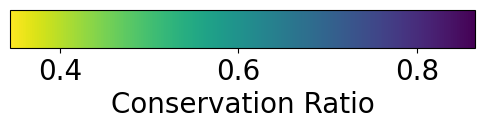

In [101]:
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

ax=plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=ax, orientation='horizontal') #, label='Conservation Score')

ax.ax.tick_params(labelsize=20)

ax.ax.set_xlabel('Conservation Ratio', fontsize=20)
                
#fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
#             cax=ax, orientation='horizontal', label='Conservation Score', )


fig.savefig(base_dir + os.sep + os.path.normpath('selected_proteins/ipath/ipath_input_cons_colorbar.svg'))